# 03_Poincare_Map_Full_Training.ipynb

In [11]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/cchu/Desktop/phd_work/hyperChromatin/src/PoincareMaps')

import os
workdir = '../results/03'
os.makedirs(workdir, exist_ok=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import scanpy as sc
import pandas as pd
import numpy as np
from refs import celltype_colors
import matplotlib.pyplot as plt
from IPython.display import Image
from run_poincare_map import features_names

from main import *
from poincare_maps import *

features_names

{'RNA PCA': '../results/02/rna_pca.celltype_label',
 'RNA Simba': '../results/02/rna_simba.celltype_label',
 'ATAC PCA': '../results/02/atac_pca.celltype_label',
 'ATAC PCA (standard)': '../results/02/atac_std_pca.celltype_label',
 'ATAC Simba': '../results/02/atac_simba.celltype_label',
 'Simba Multi': '../results/02/multi_simba.celltype_label'}

Run python script from `scripts/` folder
```bash
python run_poincare_map.py --epochs 500
```

In [13]:
rna_pca_name = '../results/03/rna_pca.celltype_label'
rna_simba_name = '../results/03/rna_simba.celltype_label'
atac_pca_name = '../results/03/atac_std_pca.celltype_label'
atac_simba_name = '../results/03/atac_simba.celltype_label'
simba_multi_name = '../results/03/multi_simba.celltype_label'

names = [rna_pca_name, rna_simba_name, atac_pca_name, atac_simba_name, simba_multi_name]

poincare_results = {
    "RNA PCA": rna_pca_name, "RNA Simba": rna_simba_name, 
    "ATAC PCA (standard)": atac_pca_name, "ATAC Simba": atac_simba_name, 
    "Simba Multi": simba_multi_name
}

In [18]:
def plot_poincare_map(name, poincare_coord_fn, zoom=1, root=None, features_fn=None):
    zoom_dir = f'{workdir}/zoom{zoom}'
    os.makedirs(zoom_dir, exist_ok=True)

    poincare_coord_df = pd.read_csv(poincare_coord_fn, sep=',')
    labels = poincare_coord_df['labels'].values
    model = PoincareMaps(poincare_coord_df[['x', 'y']].values)

    if root is not None:
        features_df = pd.read_csv(features_fn, sep=',')
        labels = poincare_coord_df['labels'].values
        if type(root) == str:
            model.iroot = poincare_root(root, labels, features_df.drop(columns=['labels']).values) 
        elif type(root) == int:
            model.iroot = root
        
        print("rotating")
        model.rotate()
        print(f"root: {model.iroot}")

    root_str = f".root{root}" if root is not None else ""
    root_title = f" (root={root})" if root is not None else ""
    img_fn = f'{zoom_dir}/{poincare_coord_fn.split("/")[-1].rsplit(".", 1)[0]}.zoom{zoom}{root_str}'

    plot_type = 'ori' if root is None else 'rot'
    model.plot(plot_type, 
               labels=labels, 
               file_name=img_fn, 
            title_name=f'{name} - Poincaré map (zoom={zoom}){root_title}',
            coldict=celltype_colors, 
            labels_order=None, 
            print_labels=False,
            zoom=zoom, bbox=(1.1, 0.8), leg=False, ft='png', ms=5)
    
    return f"{img_fn}.png"

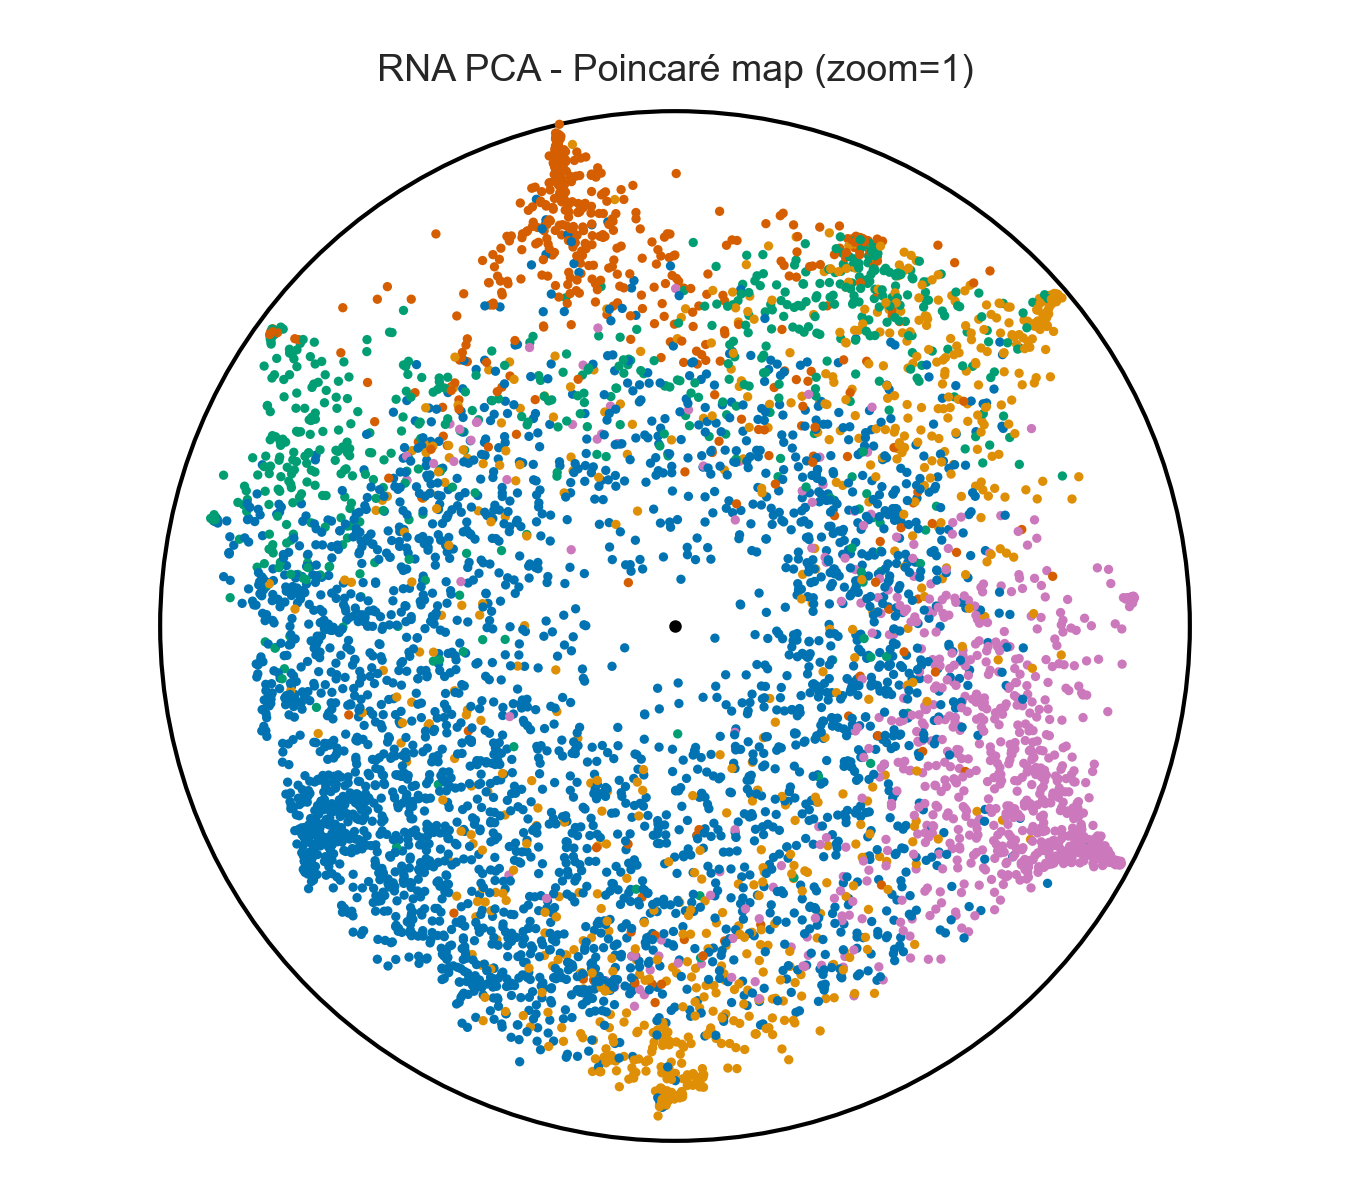

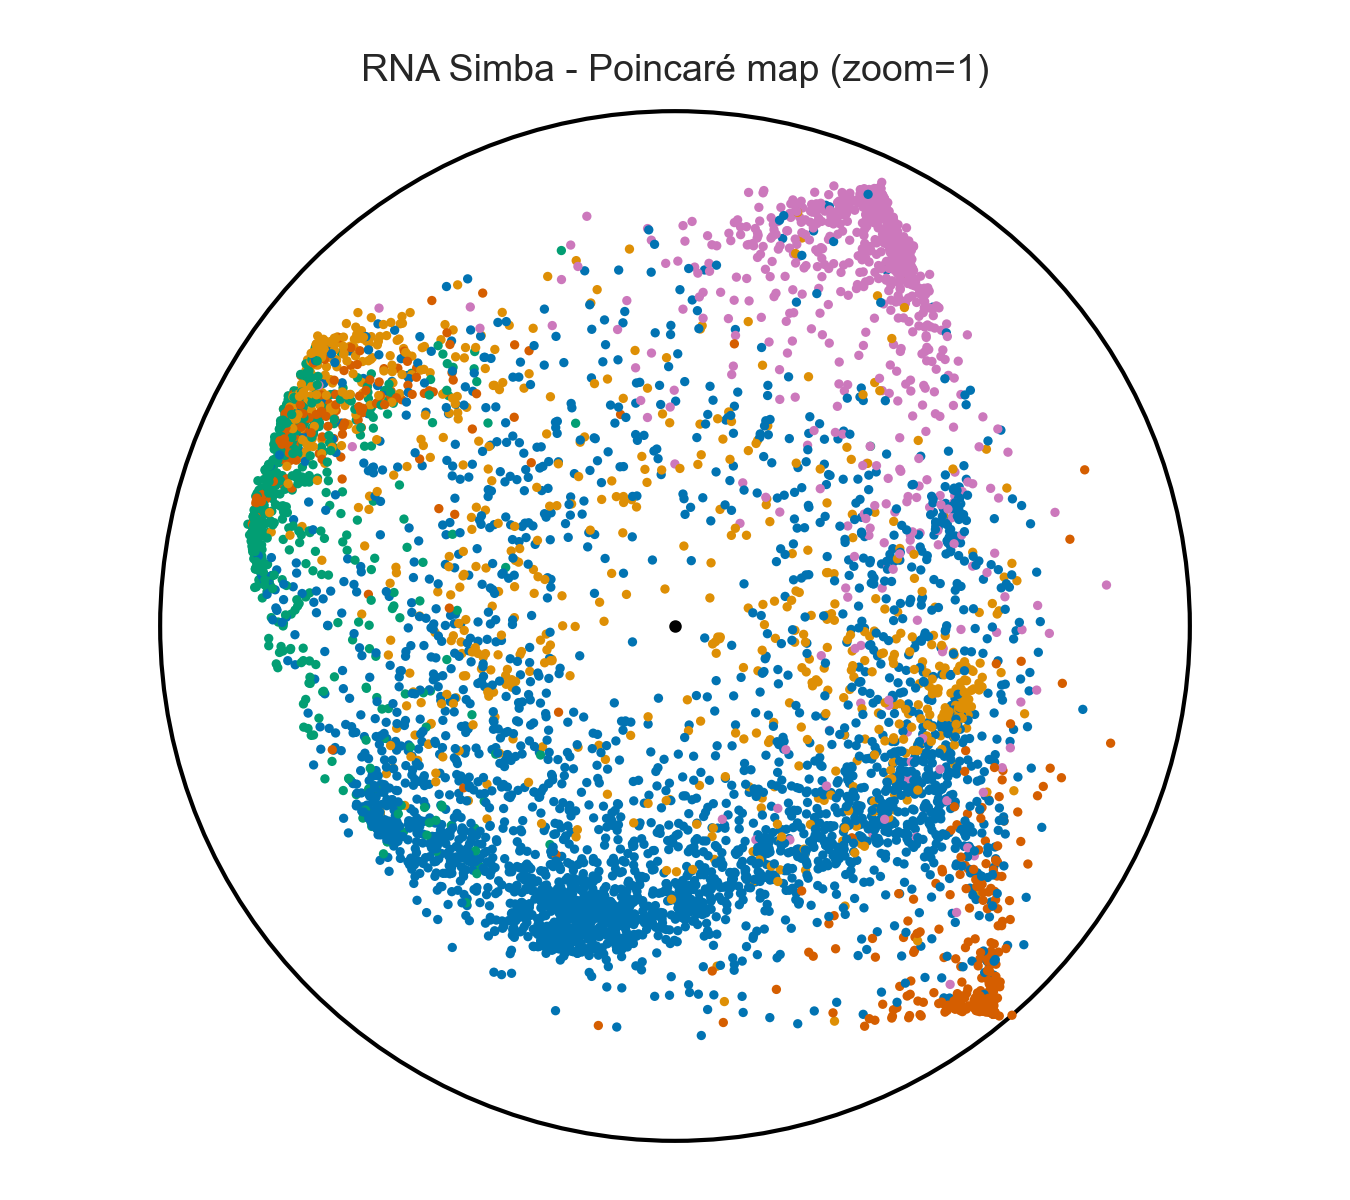

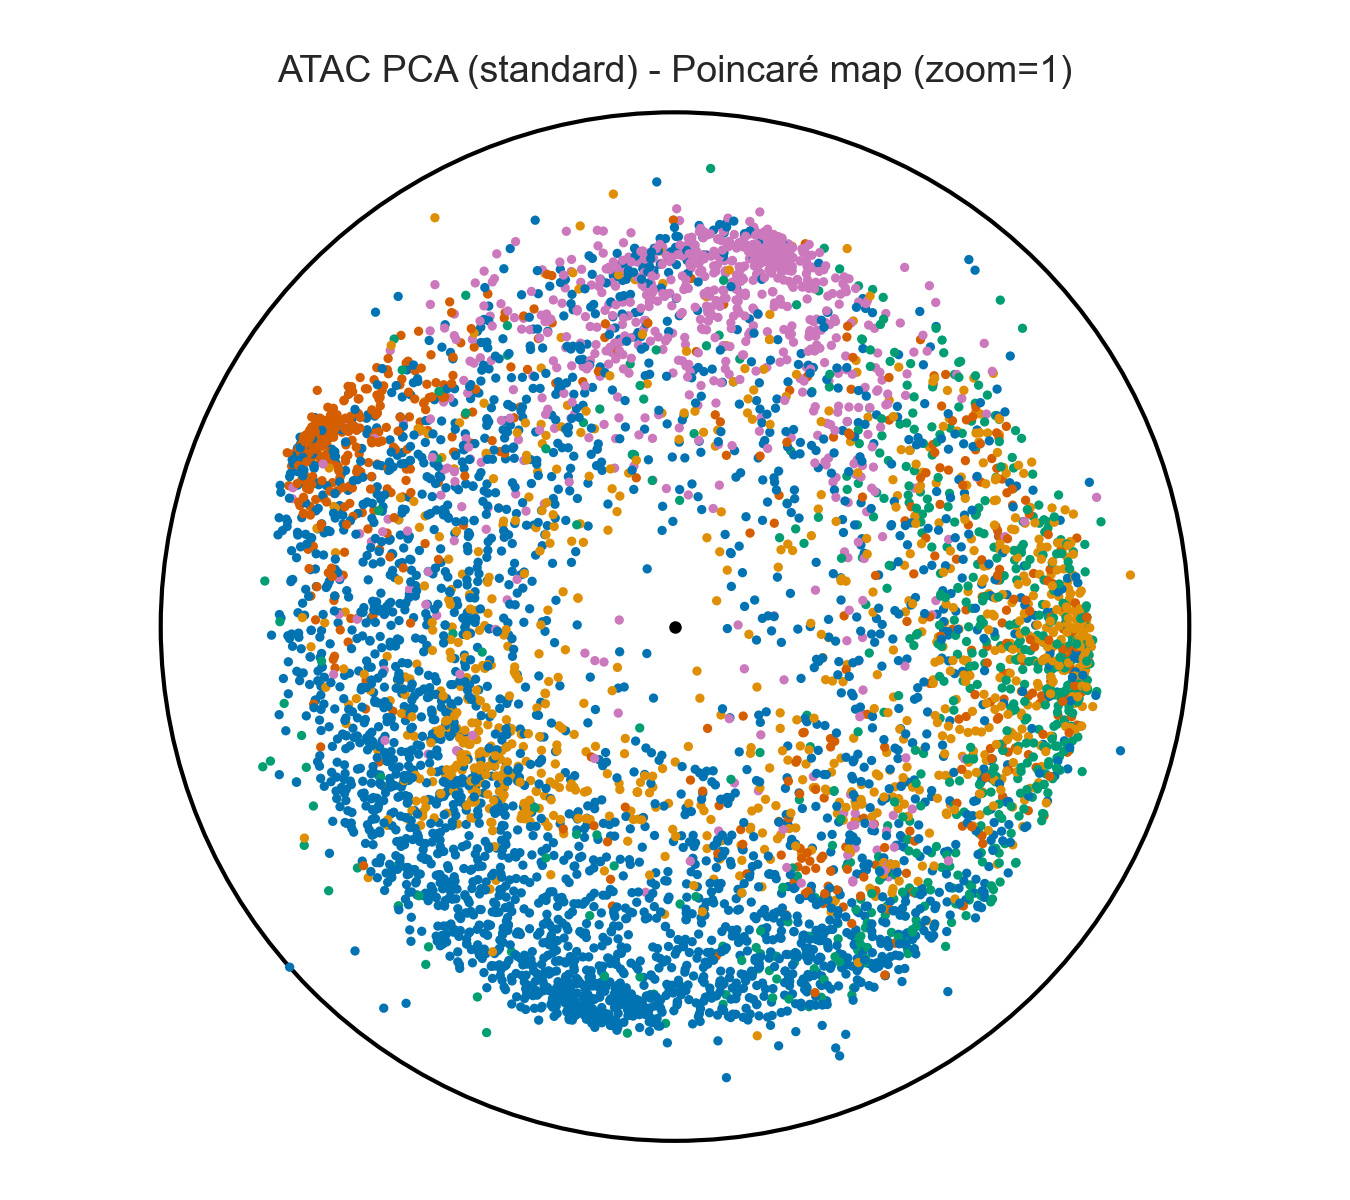

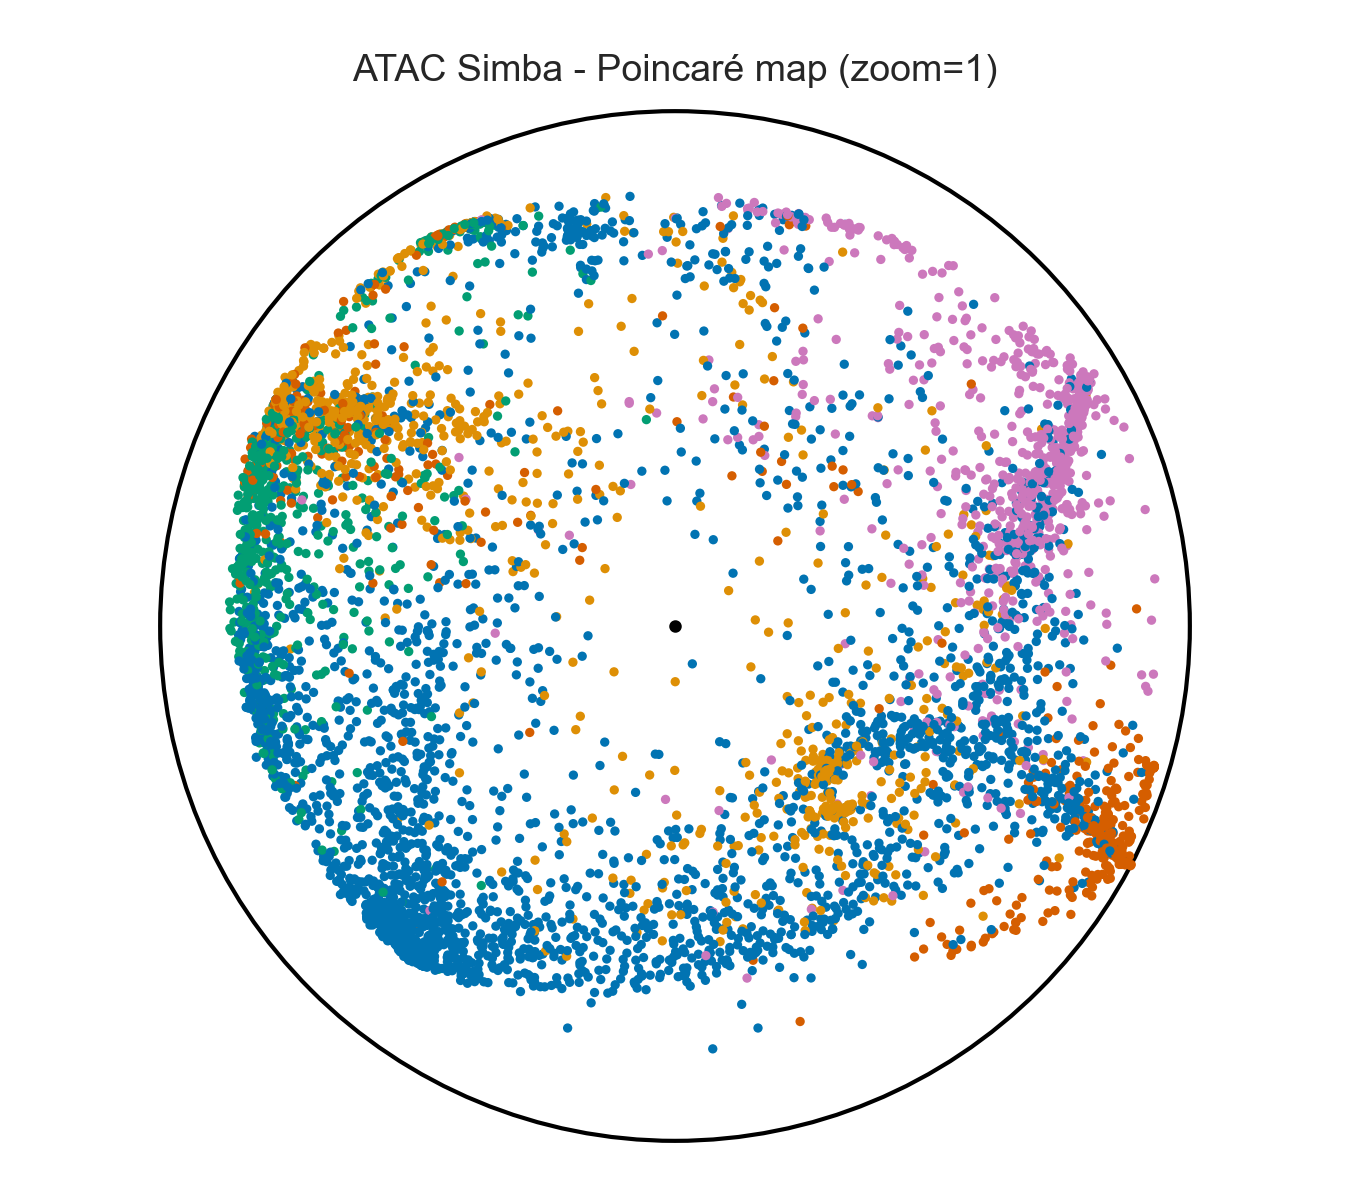

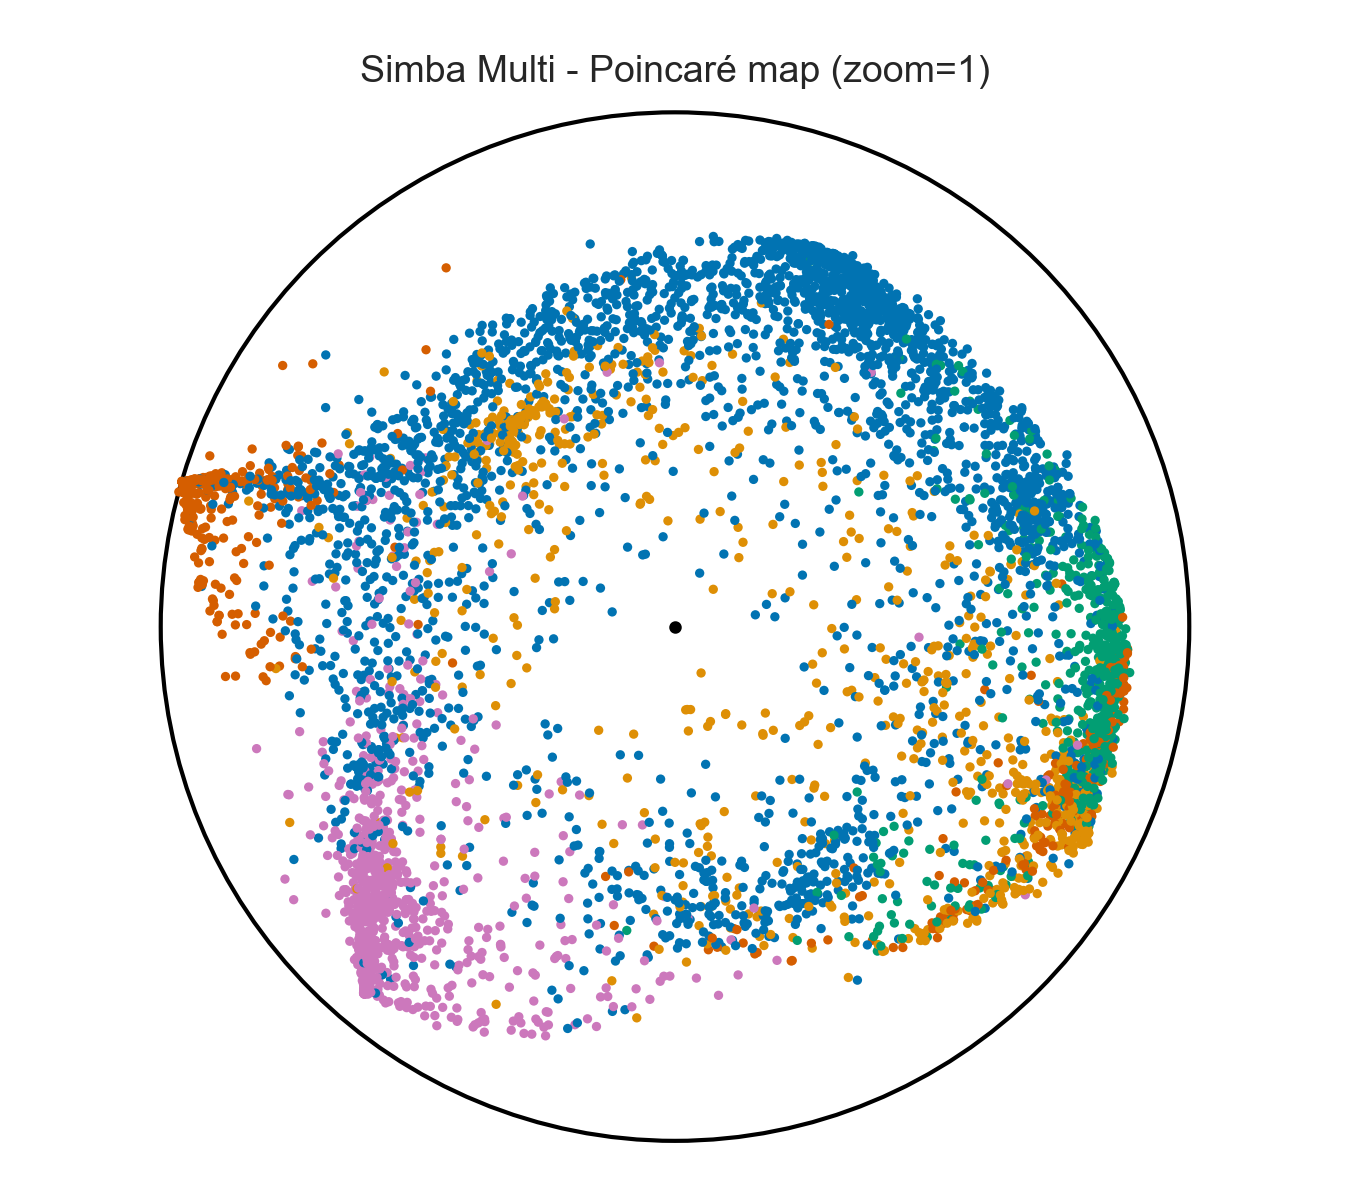

In [19]:
img_results = {}
for name, poincare_coord_name in poincare_results.items():
    poincare_coord_fn = f'{poincare_coord_name}.ep500_lr0.1.poincare_coord.labeled.csv'
    img_fn = plot_poincare_map(name, poincare_coord_fn, zoom=1)
    img_results[name] = img_fn

    img = Image(filename=img_fn)
    display(img)

# move the root

rotating
root: 531


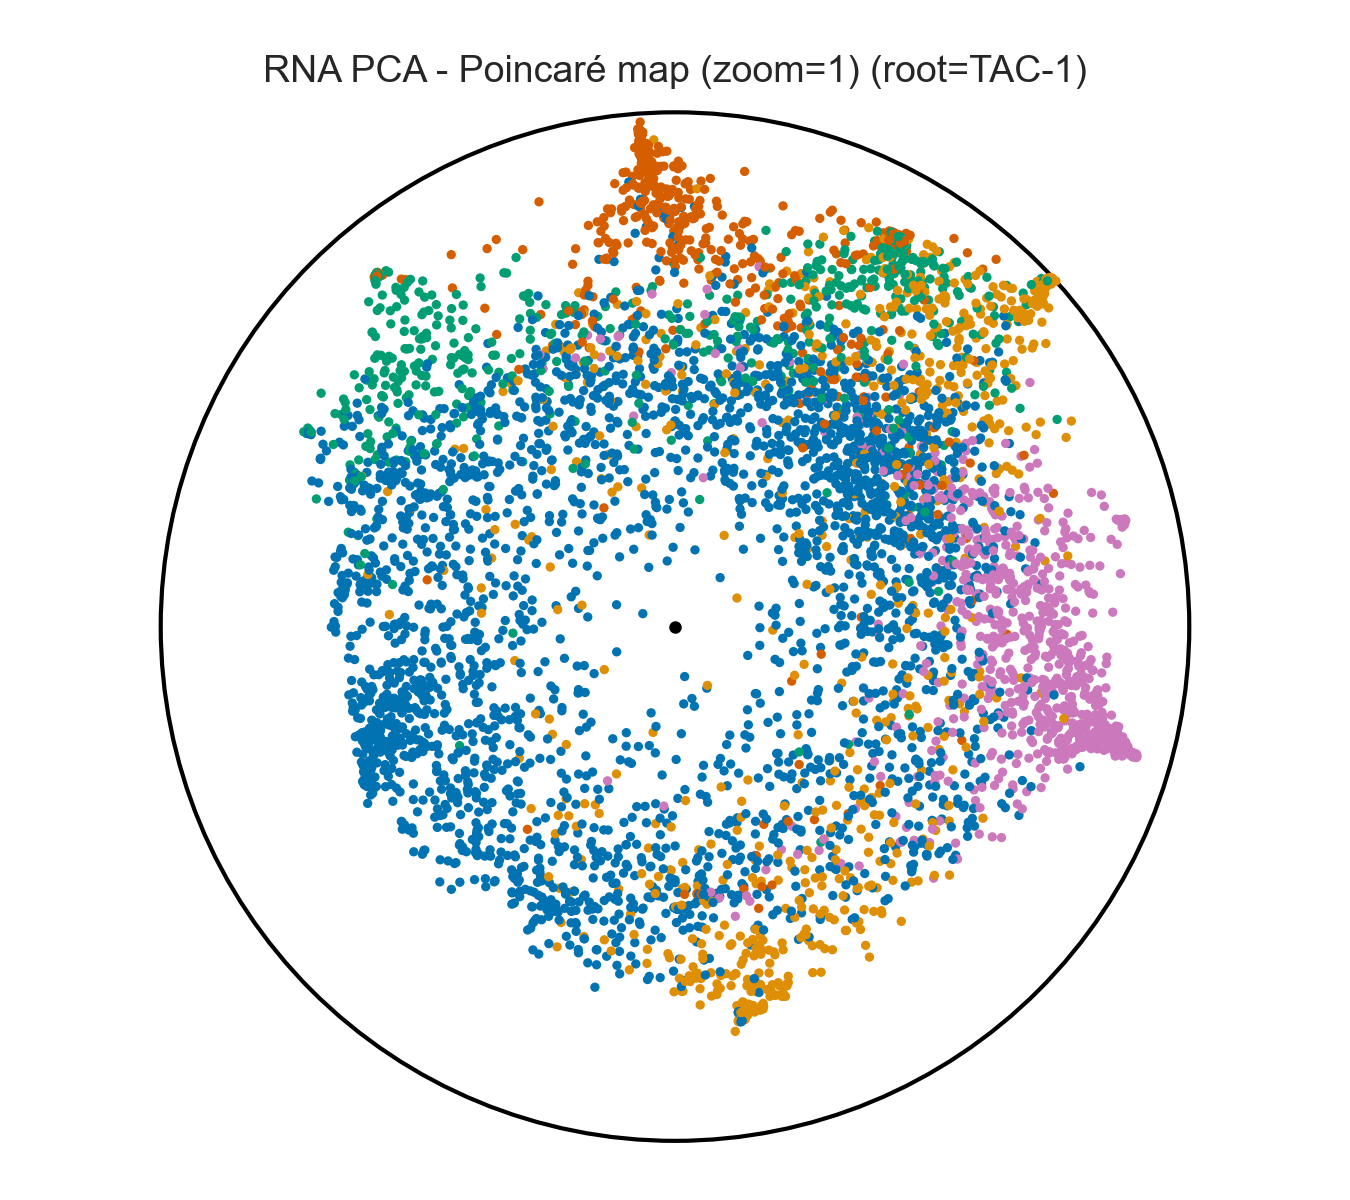

rotating
root: 228


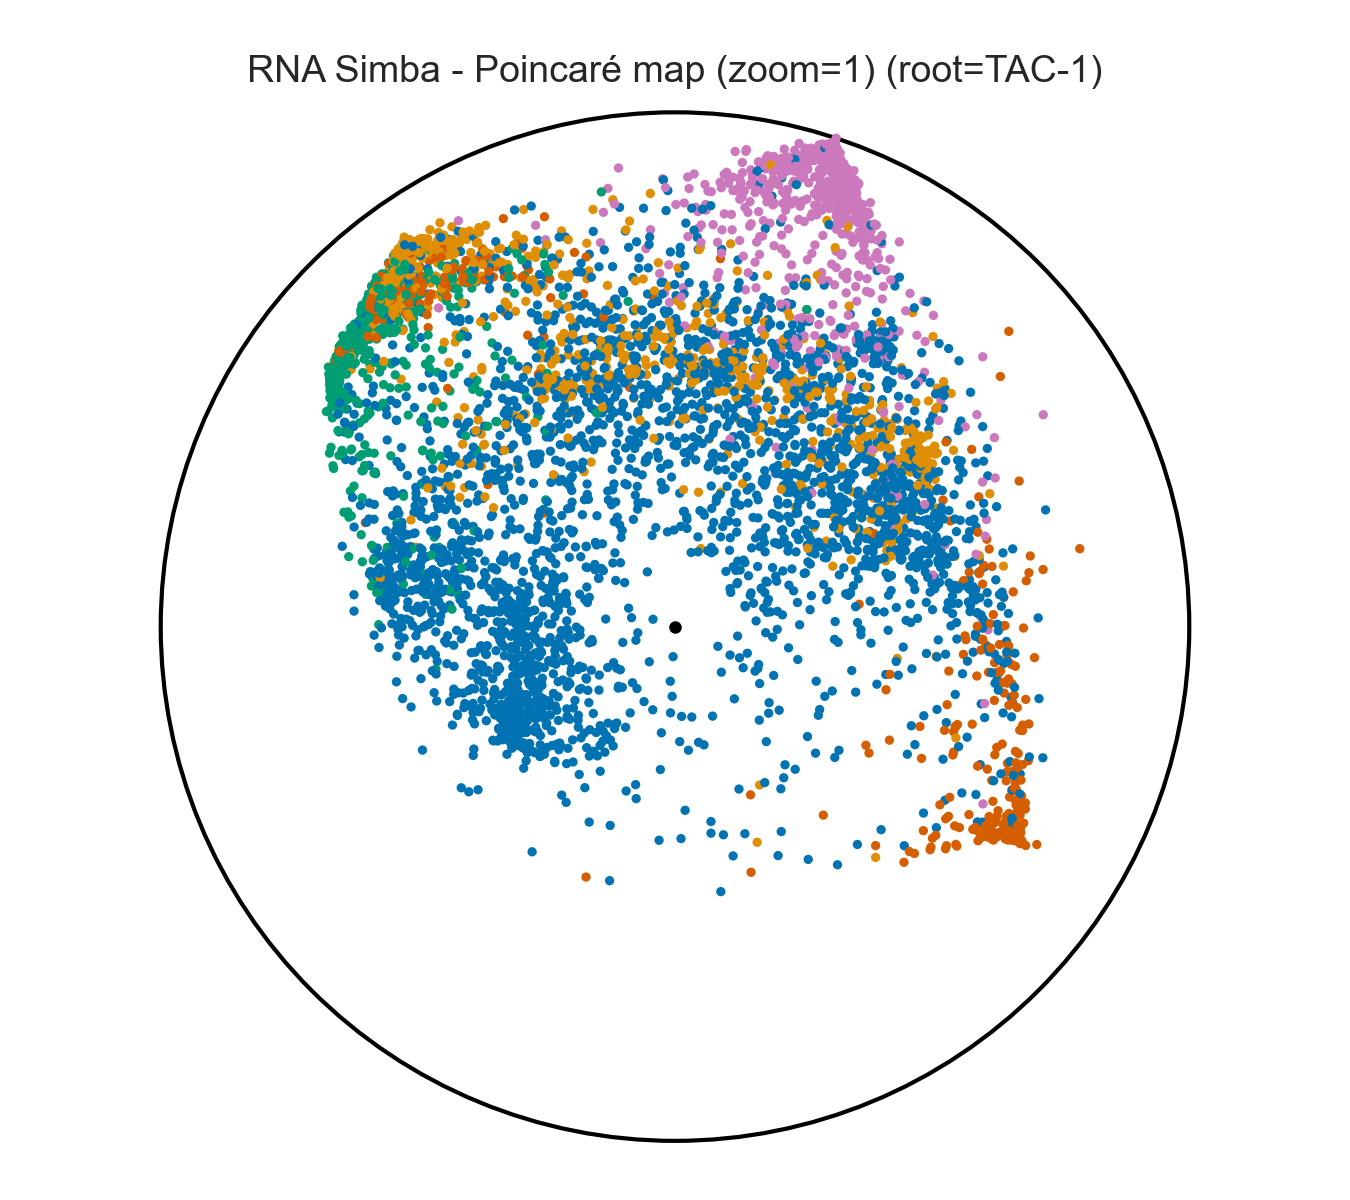

rotating
root: 1077


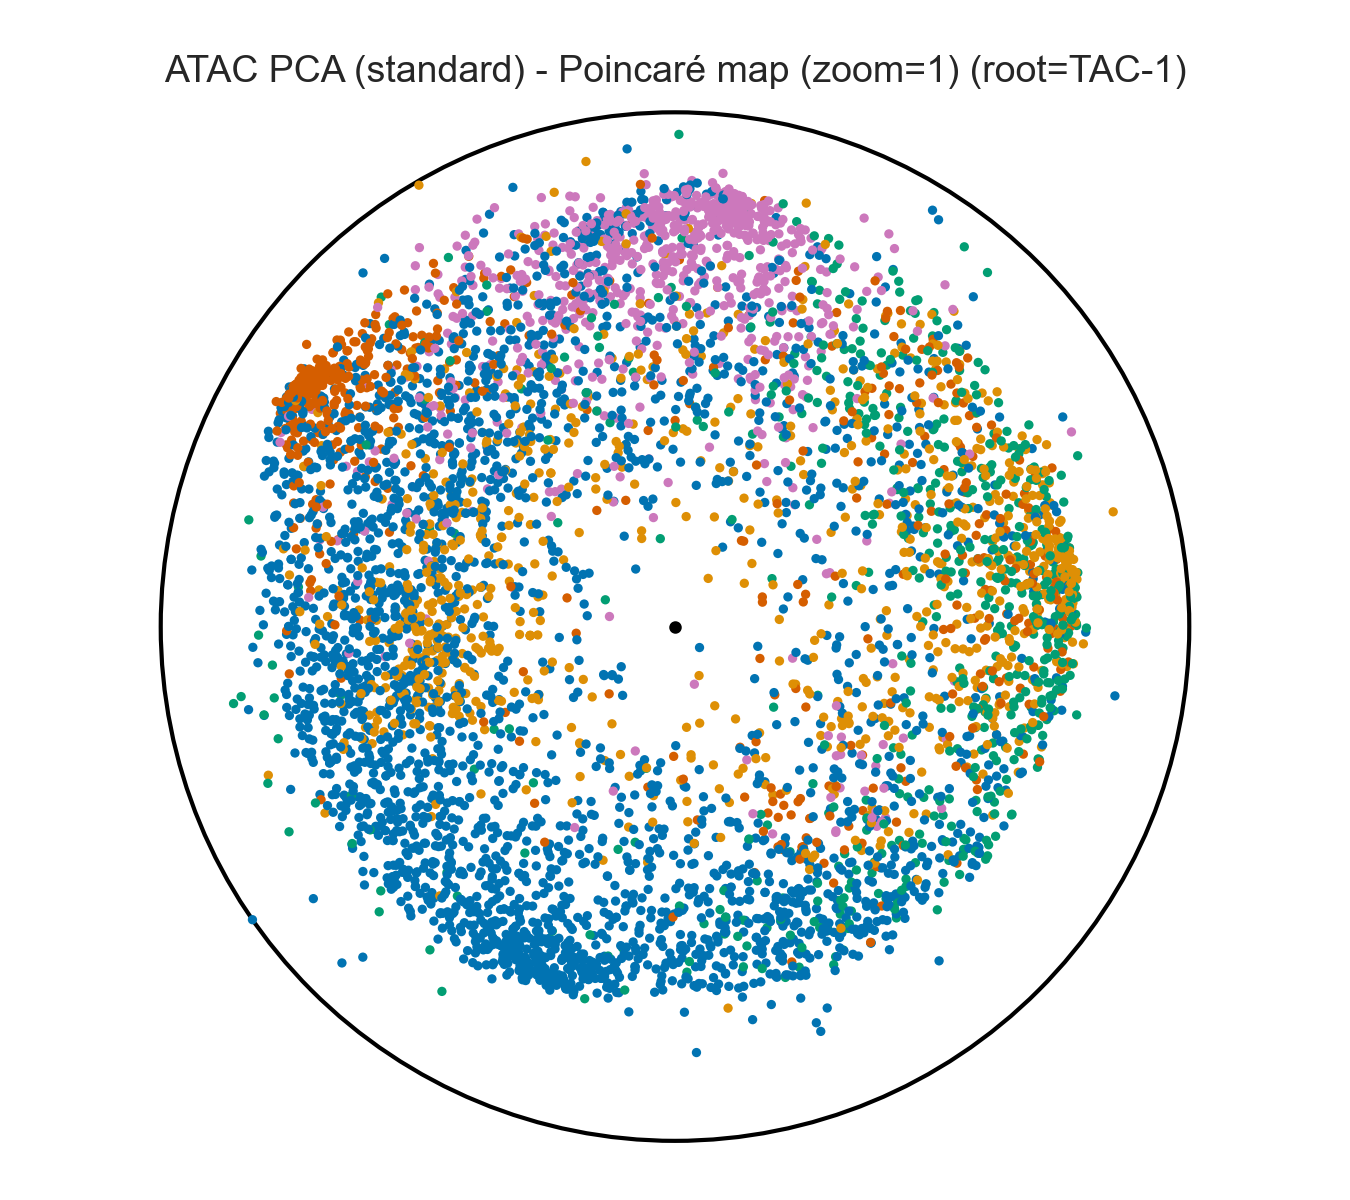

rotating
root: 4110


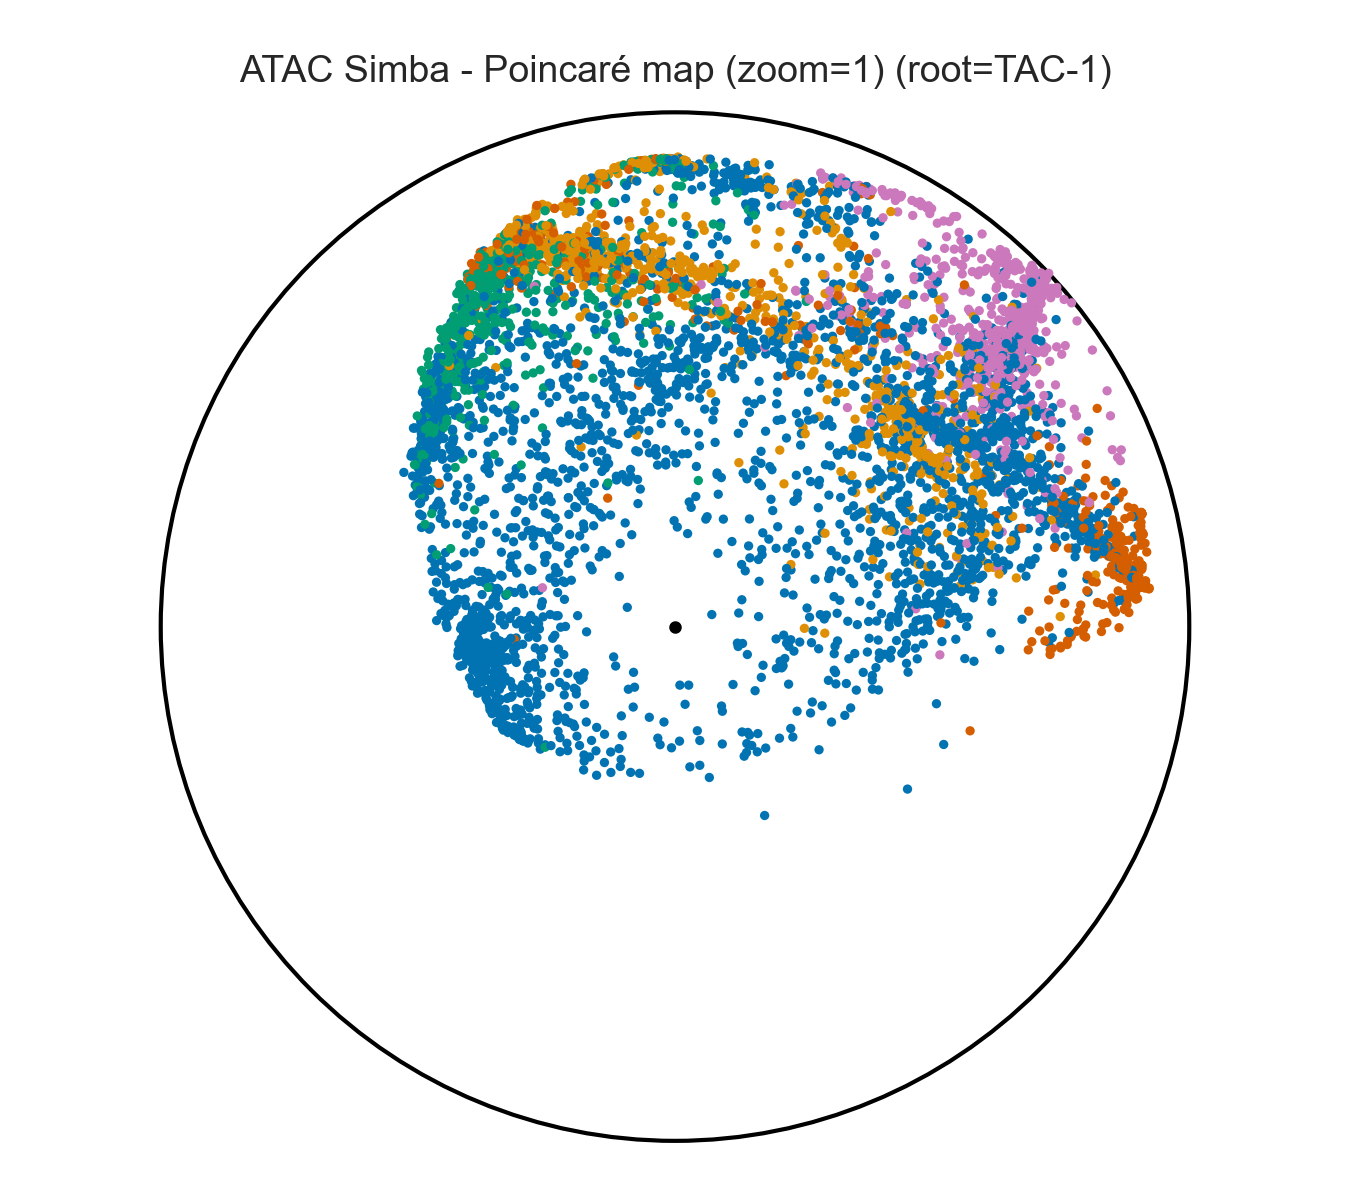

rotating
root: 1106


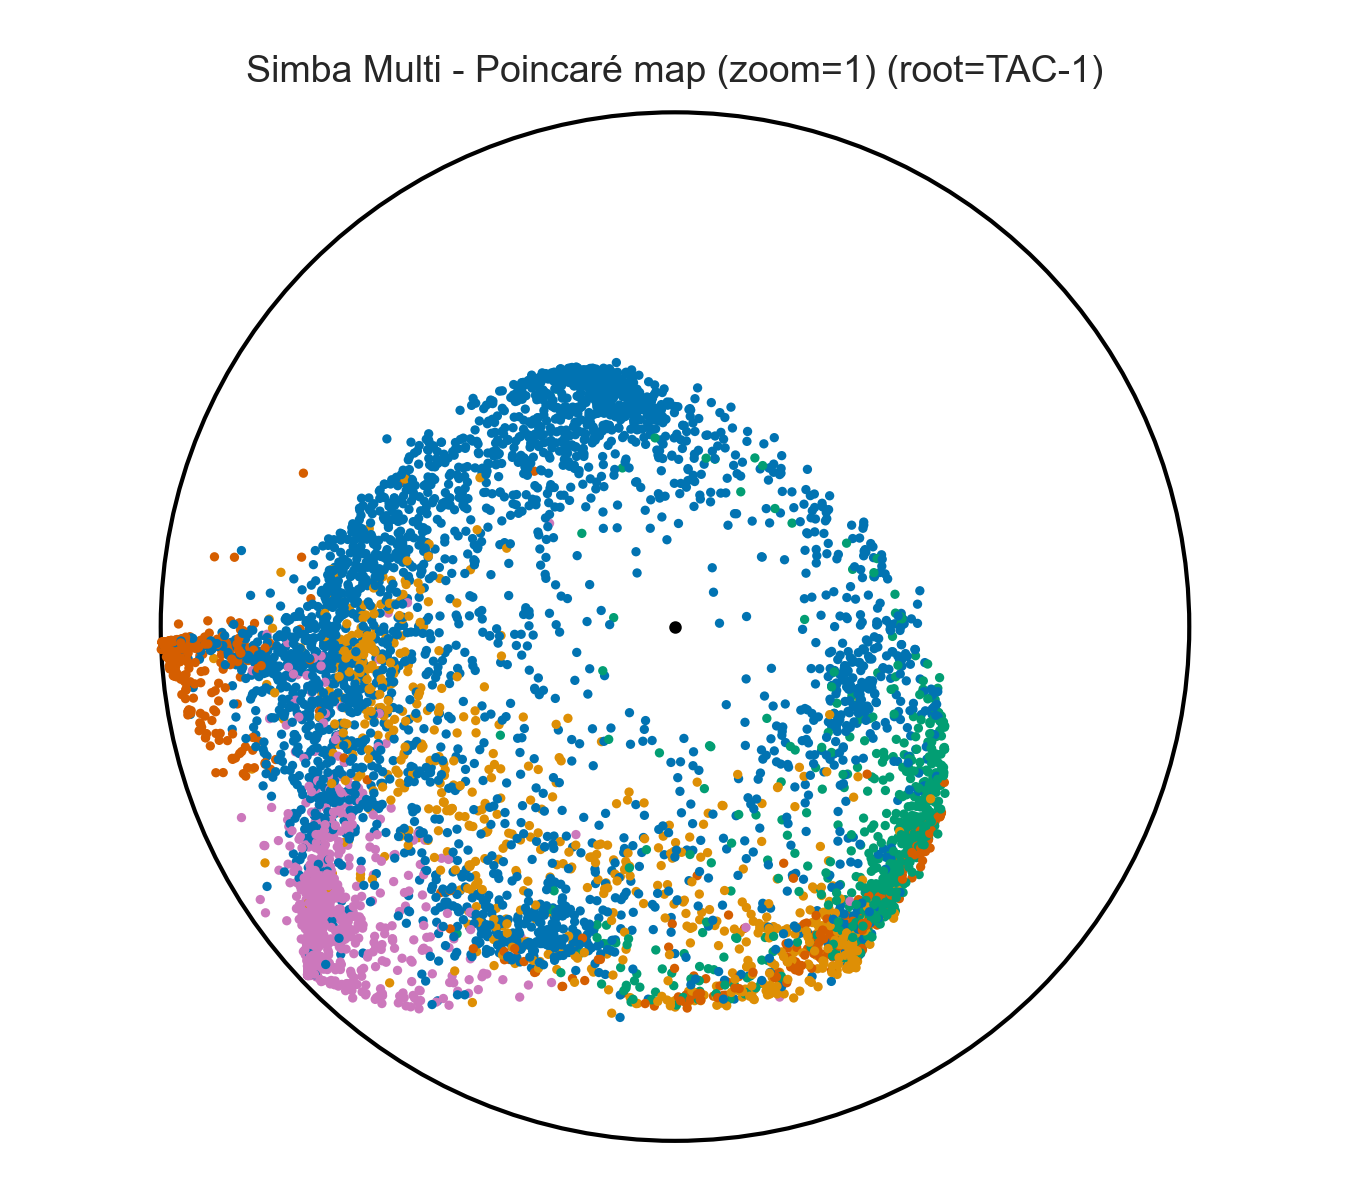

In [20]:
TAC1_img_results = {}
for name, poincare_coord_name in poincare_results.items():
    poincare_coord_fn = f'{poincare_coord_name}.ep500_lr0.1.poincare_coord.labeled.csv'
    img_fn = plot_poincare_map(name, poincare_coord_fn, zoom=1, root='TAC-1', features_fn=f"{features_names[name]}.csv")
    TAC1_img_results[name] = img_fn

    img = Image(filename=img_fn)
    display(img)


rotating
root: 4791


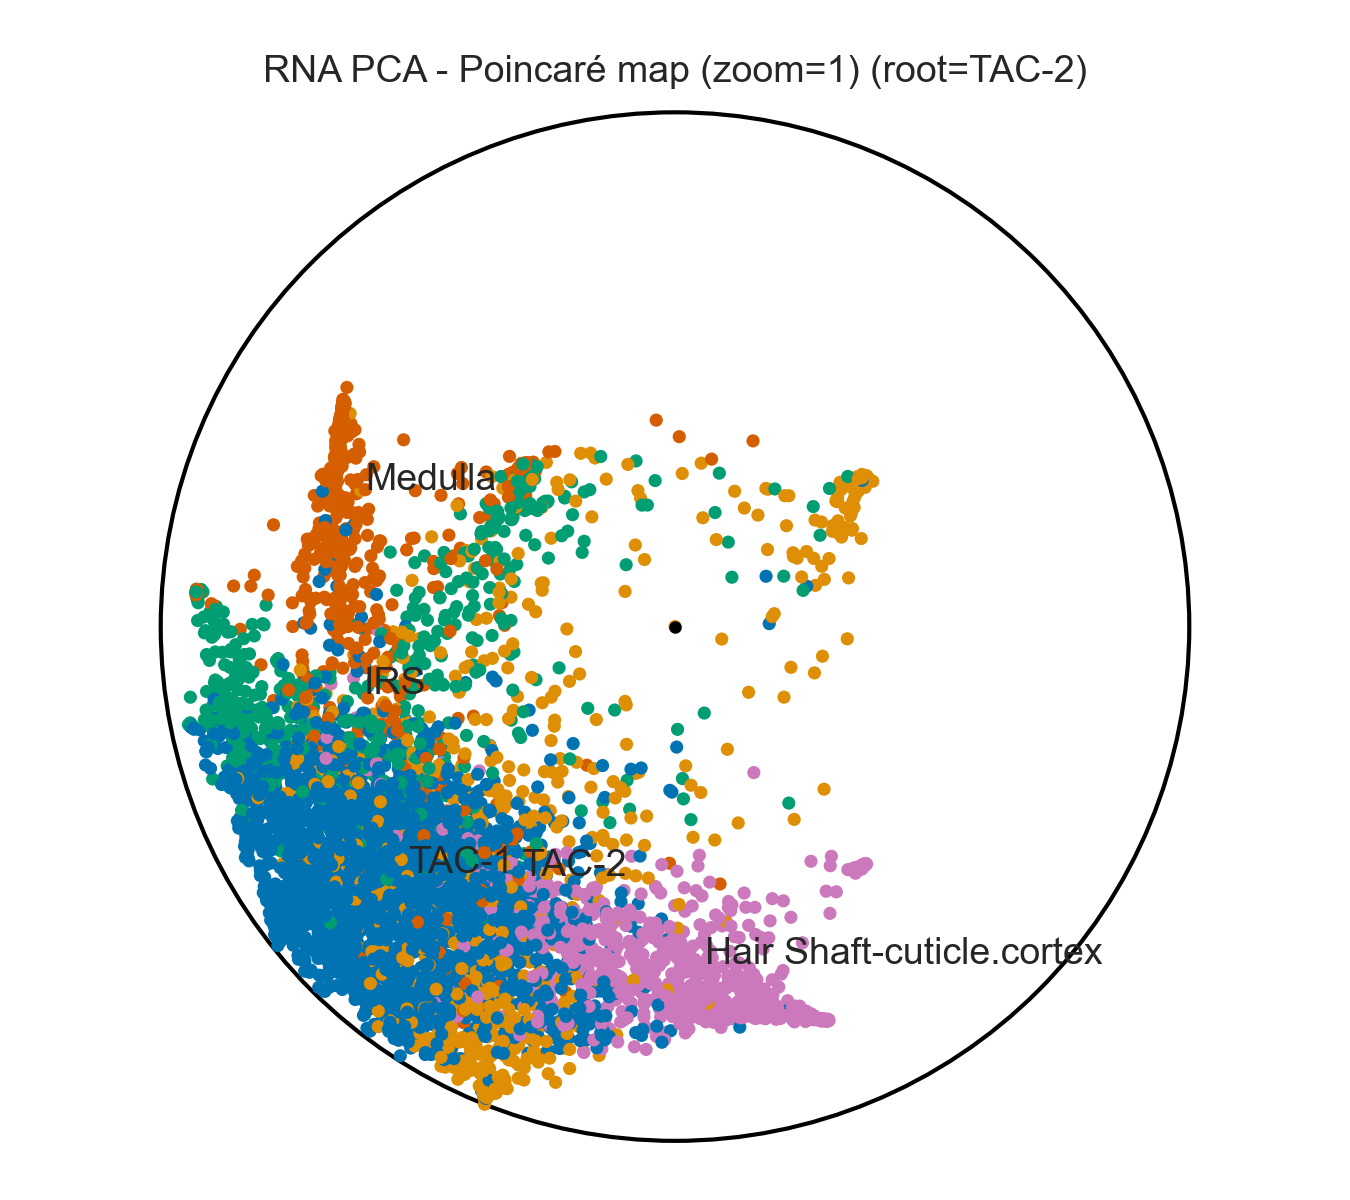

rotating
root: 1671


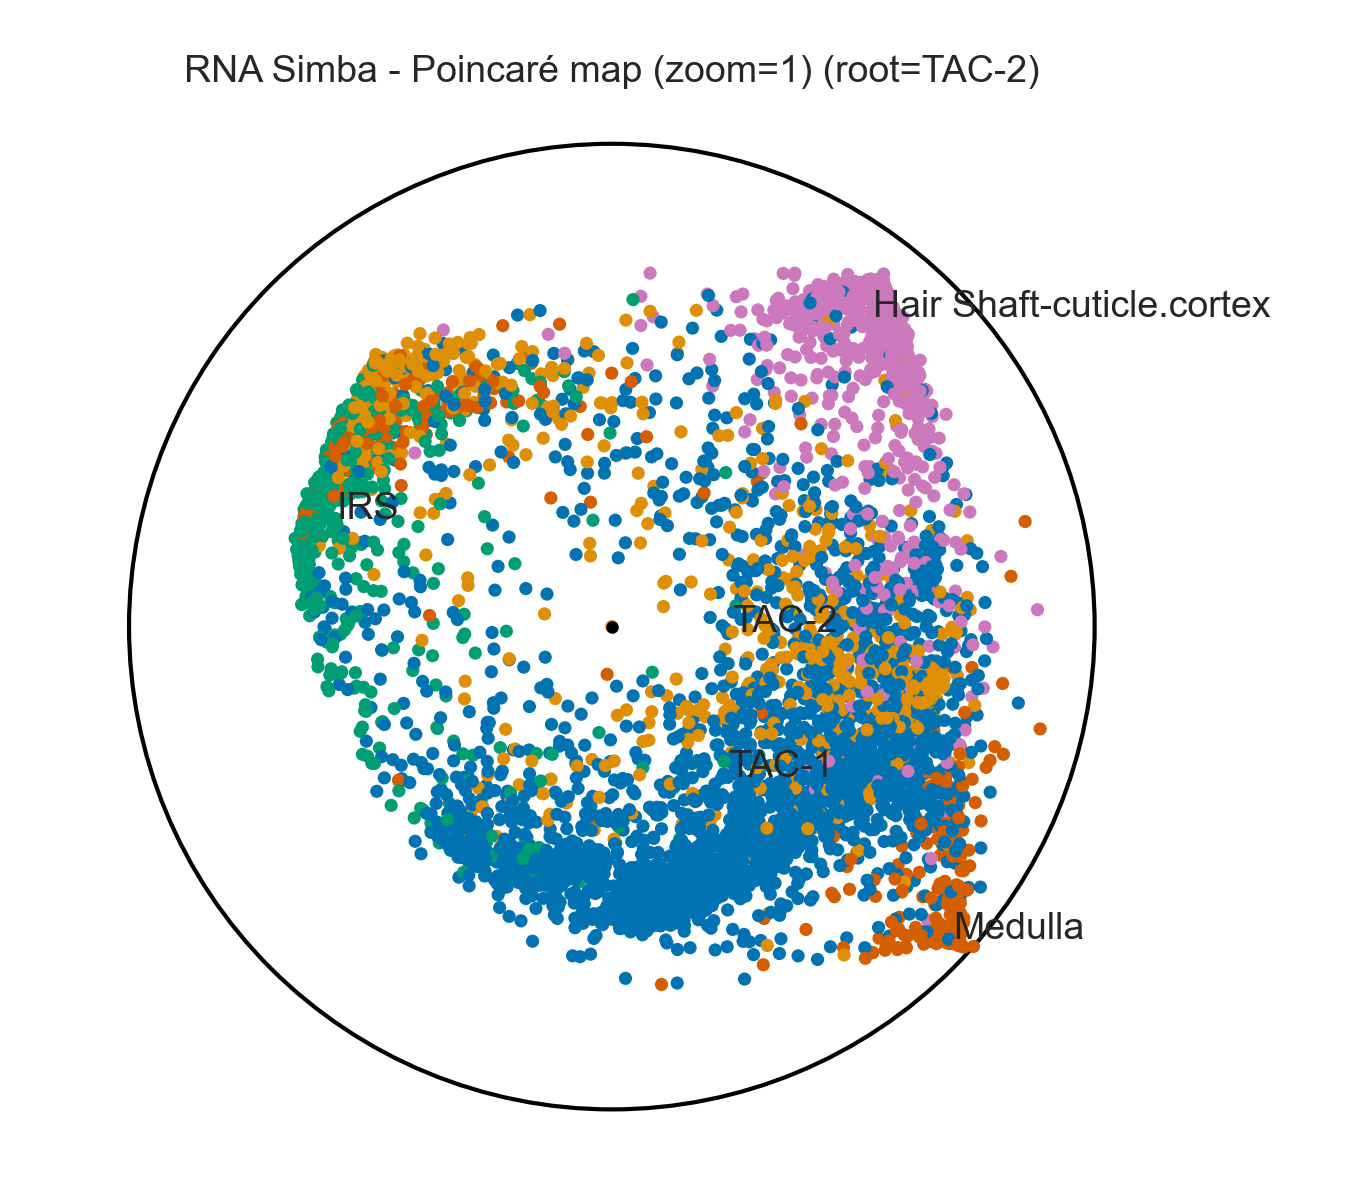

rotating
root: 4861


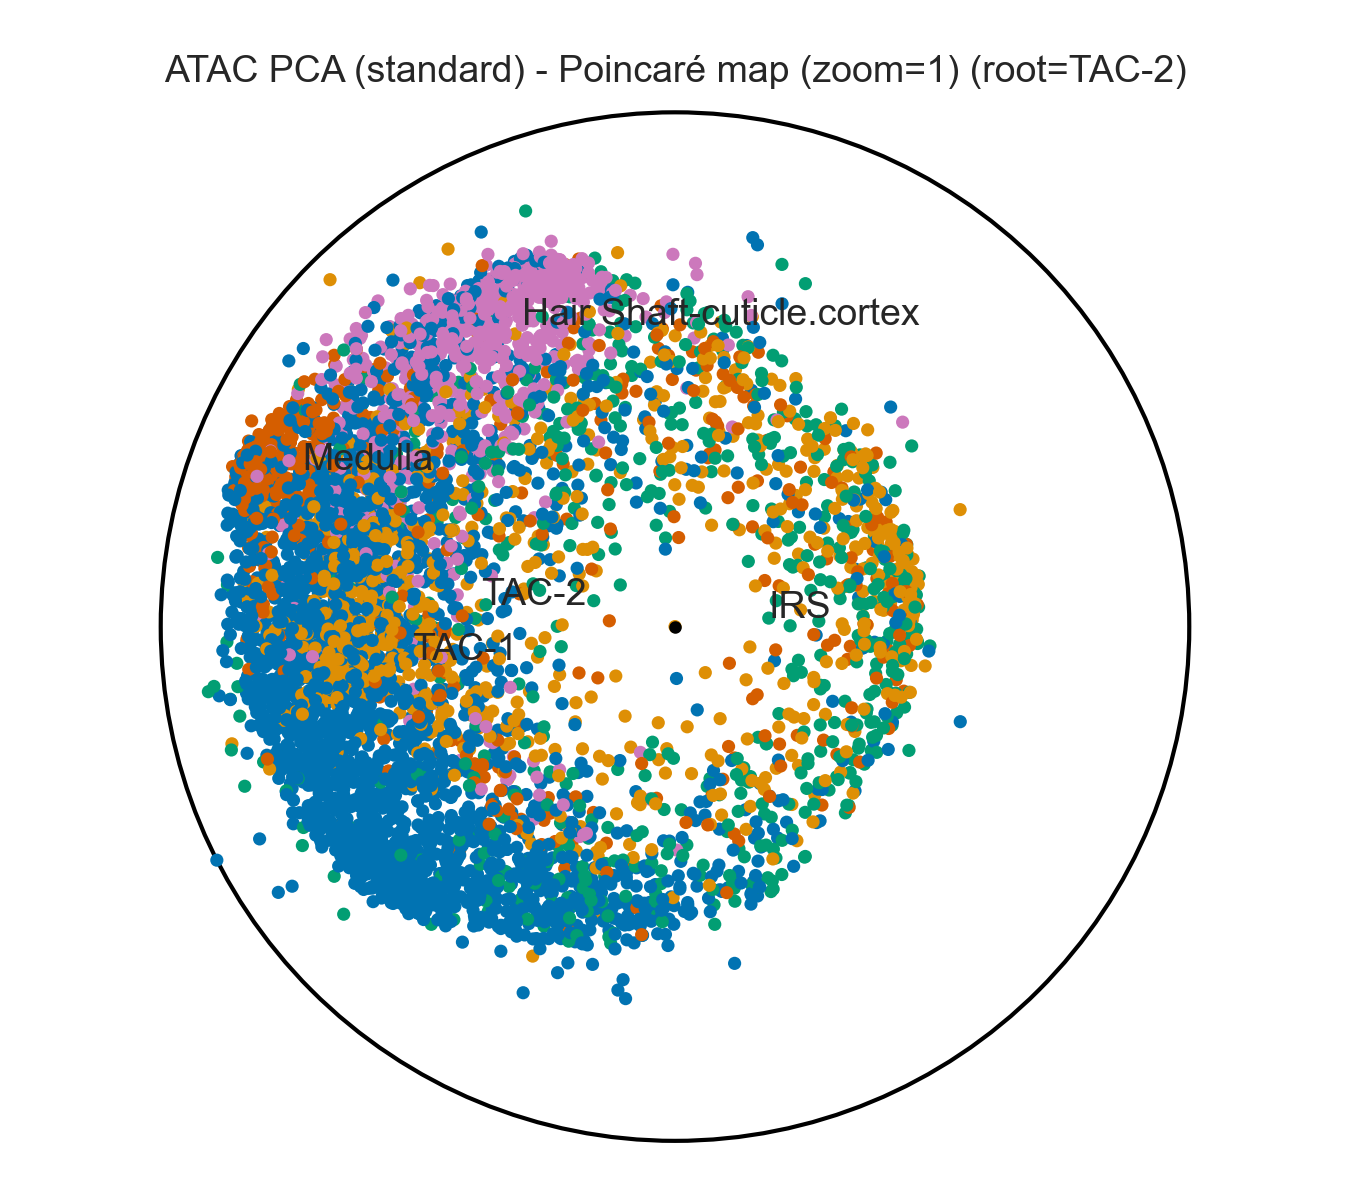

rotating
root: 4825


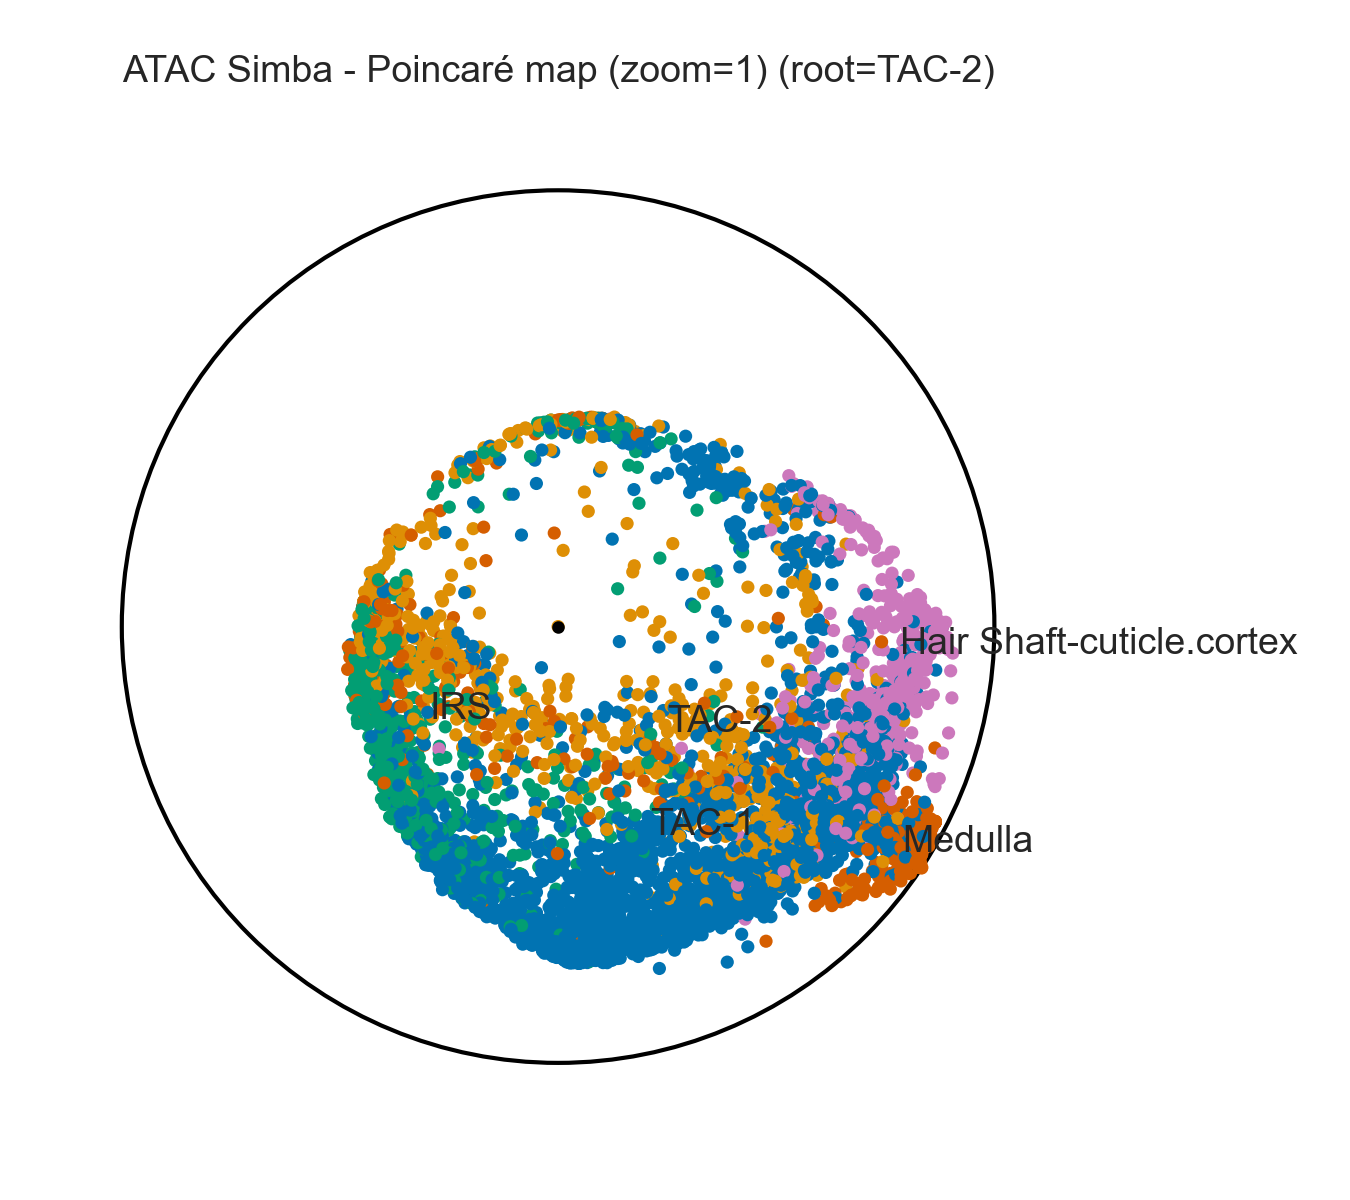

rotating
root: 3470


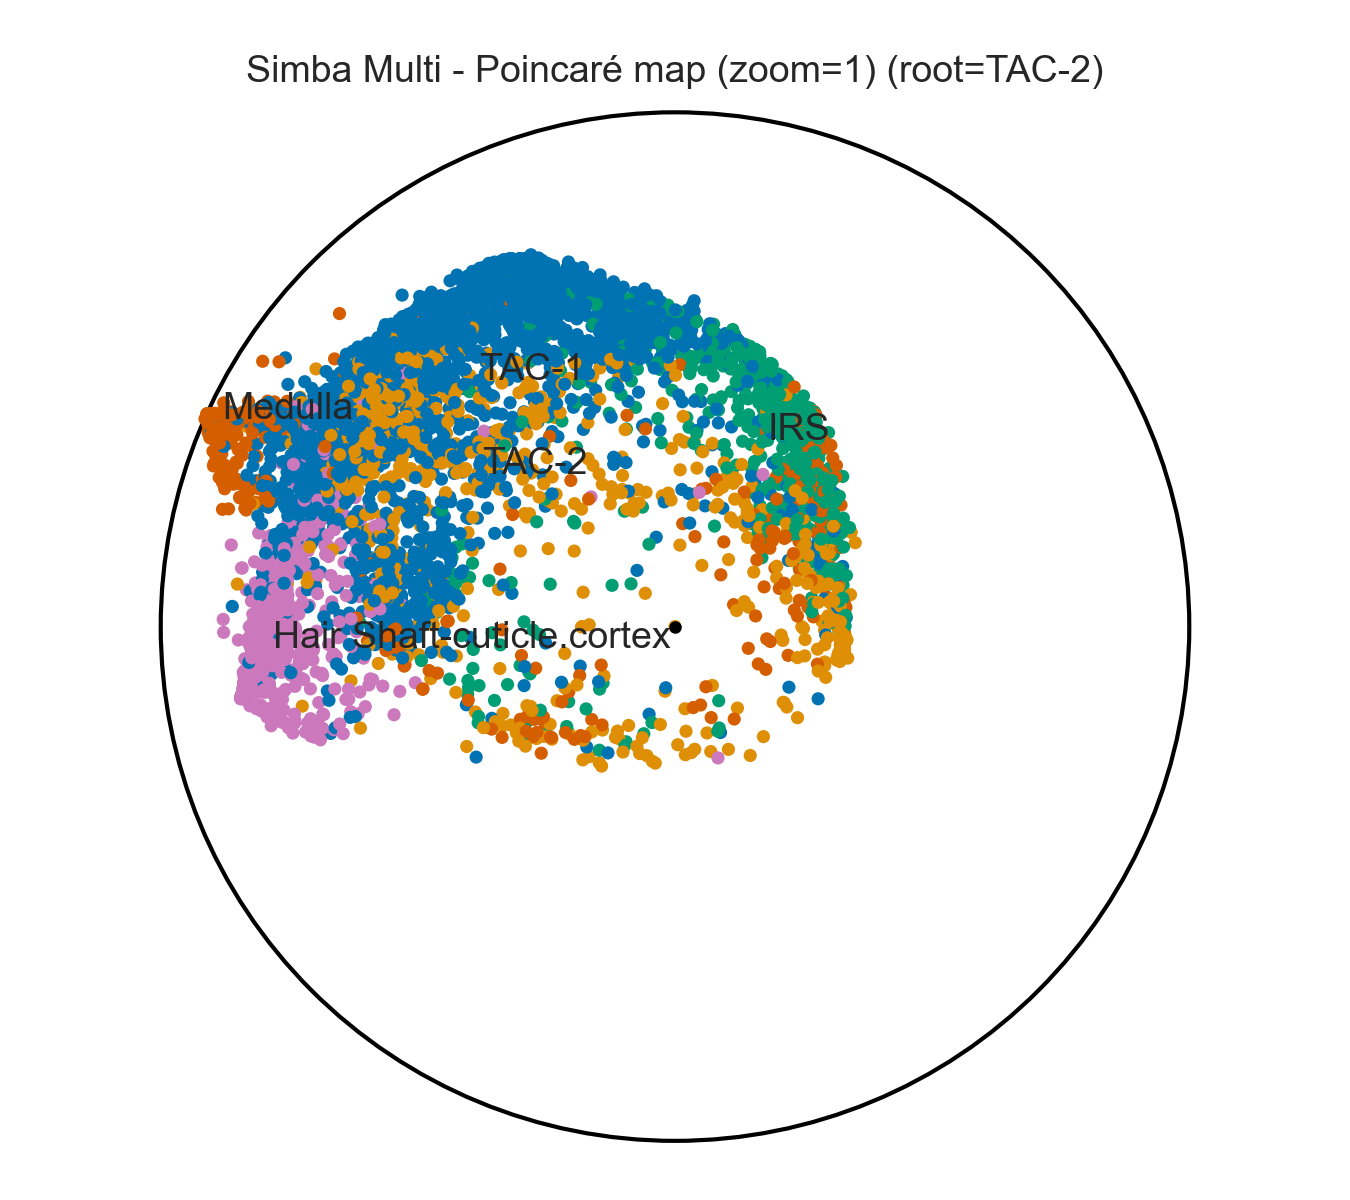

In [7]:
TAC2_img_results = {}
for name, poincare_coord_name in poincare_results.items():
    poincare_coord_fn = f'{poincare_coord_name}.ep500_lr0.1.poincare_coord.labeled.csv'
    img_fn = plot_poincare_map(name, poincare_coord_fn, zoom=1, root='TAC-2', features_fn=f"{features_names[name]}.csv")
    TAC2_img_results[name] = img_fn

    img = Image(filename=img_fn, width=1000)
    display(img)


TODO: see if I can map the SIMBA genes/peaks into the Poincare map? Peaks/TSS associated with early changes that determine the cell fate?

Change the curvature parameters of the Poincare map?

# Test

In [4]:
CG_features, CG_labels = prepare_data(rna_pca_name, 
                                with_labels=True, 
                                normalize=True, 
                                n_pca=0)

Default batchsize is 512. Shorten it to 32?

In [10]:
CG_poincare_coord, _ = compute_poincare_maps(CG_features, CG_labels,
                        f"{workdir}/rna_pca.celltype_label.poincare_coord",
                        mode='features', k_neighbours=15, 
                        distlocal='minkowski', sigma=1.0, gamma=2.0,
                        color_dict=celltype_colors, epochs=100,
                        batchsize=32, lr=0.1, earlystop=0.0001, cuda=0)

Computing laplacian...
Laplacian computed in 2.83 sec
Computing RFA...
RFA computed in 4.93 sec
Starting training...


loss: 0.50008: 100%|██████████████████████████| 100/100 [10:05<00:00,  6.05s/it]


PM computed in 605.20 sec
loss = 5.001e-01
time = 10.090 min


In [6]:
rna_model = PoincareMaps(CG_poincare_coord)
rna_model.plot('ori', labels=CG_labels, file_name=f'{workdir}/rna_pca.celltype_label.poincare_coord_b32', 
           title_name='Poincaré map',
           coldict=celltype_colors, 
           labels_order=None, 
           zoom=4, bbox=(1.1, 0.8), leg=False, ft='png')

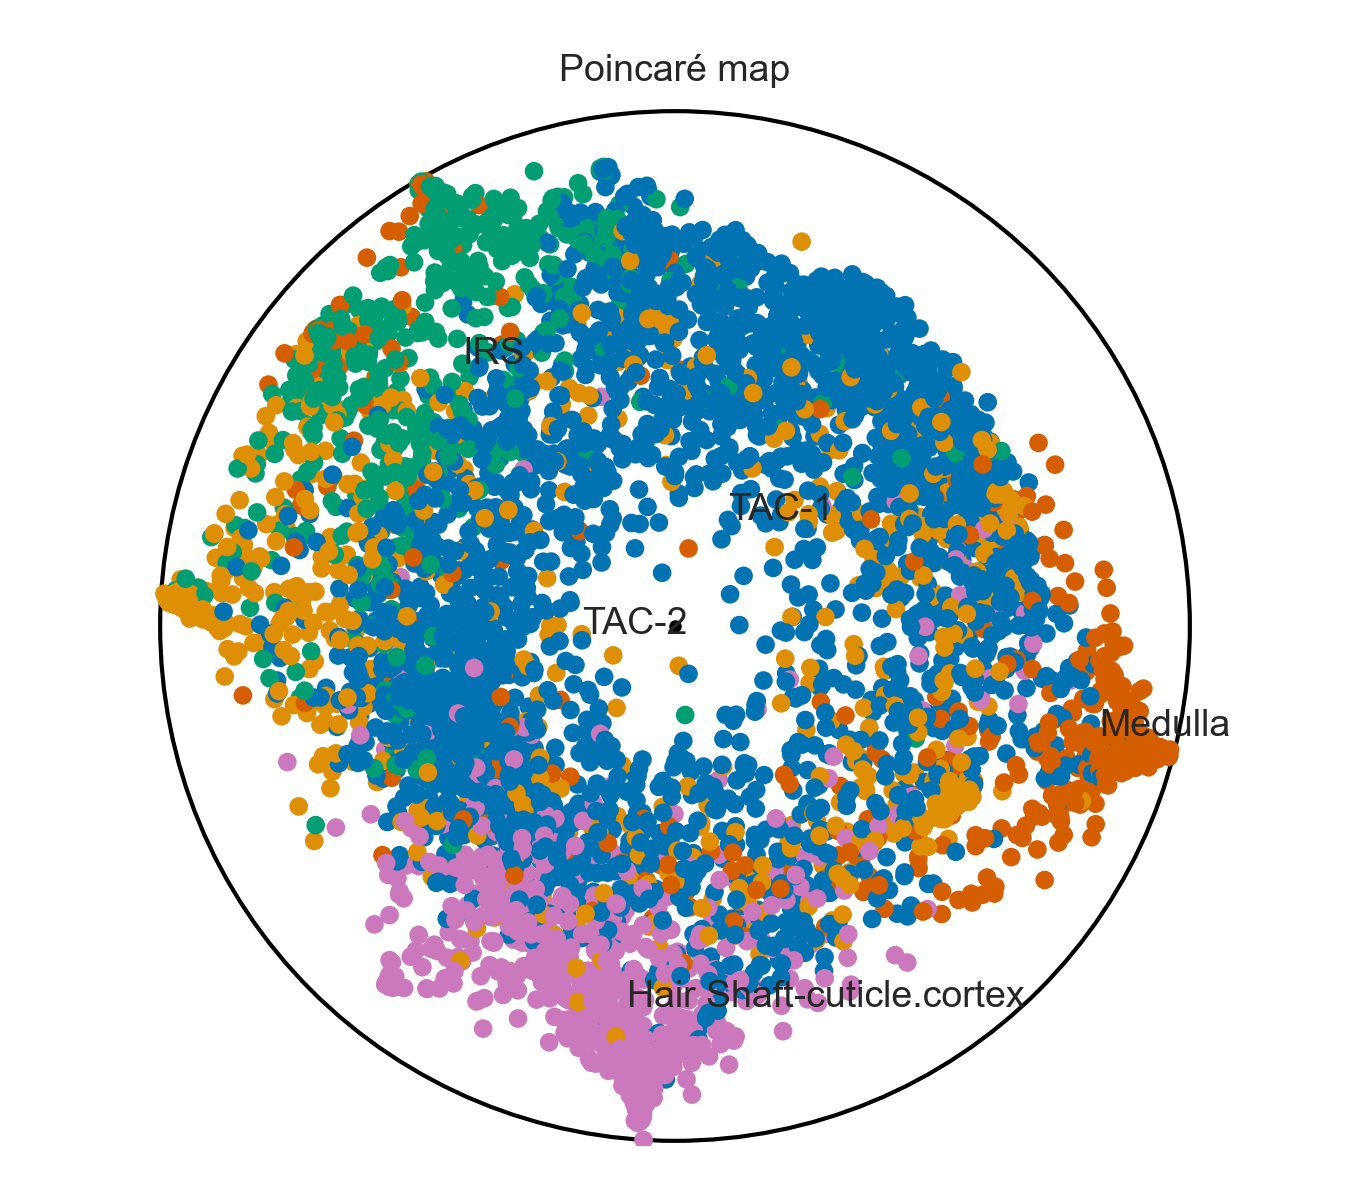

In [7]:
fig = Image(filename=f'{workdir}/rna_pca.celltype_label.poincare_coord_b32.png')
fig